1. Import Libraries

In [1]:
#import libraries
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import statsmodels.api as sm
import warnings


warnings.filterwarnings("ignore")

plt.style.use('fivethirtyeight')

In [2]:
#configure API key
quandl.ApiConfig.api_key = 'JhyHuK9RKvpqy5SbXRTY'

In [3]:
data = quandl.get('LBMA/GOLD')

In [6]:
data.head(20)

,USD (AM),USD (PM),GBP (AM),GBP (PM),EURO (AM),EURO (PM)
Date,,,,,,
1968-01-02,35.18,NaN,14.641,NaN,NaN,NaN
1968-01-03,35.16,NaN,14.617,NaN,NaN,NaN
1968-01-04,35.14,NaN,14.603,NaN,NaN,NaN
1968-01-05,35.14,NaN,14.597,NaN,NaN,NaN
1968-01-08,35.14,NaN,14.586,NaN,NaN,NaN
1968-01-09,35.14,NaN,14.576,NaN,NaN,NaN
1968-01-10,35.15,NaN,14.576,NaN,NaN,NaN
1968-01-11,35.17,NaN,14.596,NaN,NaN,NaN
1968-01-12,35.18,NaN,14.607,NaN,NaN,NaN


In [7]:
data.tail(20)

,USD (AM),USD (PM),GBP (AM),GBP (PM),EURO (AM),EURO (PM)
Date,,,,,,
2023-04-18,1999.30,1999.40,1607.64,1609.52,1821.76,1825.05
2023-04-19,1976.10,1990.55,1590.76,1598.61,1806.95,1815.78
2023-04-20,1994.05,2007.15,1605.01,1611.54,1819.77,1828.11
2023-04-21,1986.10,1973.65,1603.18,1594.91,1812.71,1802.93
2023-04-24,1986.15,1978.20,1594.48,1588.89,1802.23,1794.43
2023-04-25,1990.20,1987.40,1596.54,1601.65,1803.12,1806.75
2023-04-26,1999.05,2003.00,1602.84,1603.40,1809.74,1807.31
2023-04-27,1997.65,1985.65,1602.91,1592.69,1808.47,1802.57
2023-04-28,1982.70,1982.55,1591.32,1585.25,1804.26,1803.33


In [8]:
data.shape

(13993, 6)

In [9]:
type(data)

pandas.core.frame.DataFrame

In [10]:
data.columns

Index(['USD (AM)', 'USD (PM)', 'GBP (AM)', 'GBP (PM)', 'EURO (AM)',
       'EURO (PM)'],
      dtype='object')

In [11]:
data2 = data.reset_index()

In [12]:
data2.head(20)

,Date,USD (AM),USD (PM),GBP (AM),GBP (PM),EURO (AM),EURO (PM)
0,1968-01-02,35.18,NaN,14.641,NaN,NaN,NaN
1,1968-01-03,35.16,NaN,14.617,NaN,NaN,NaN
2,1968-01-04,35.14,NaN,14.603,NaN,NaN,NaN
3,1968-01-05,35.14,NaN,14.597,NaN,NaN,NaN
4,1968-01-08,35.14,NaN,14.586,NaN,NaN,NaN
5,1968-01-09,35.14,NaN,14.576,NaN,NaN,NaN
6,1968-01-10,35.15,NaN,14.576,NaN,NaN,NaN
7,1968-01-11,35.17,NaN,14.596,NaN,NaN,NaN
8,1968-01-12,35.18,NaN,14.607,NaN,NaN,NaN
9,1968-01-15,35.18,NaN,14.597,NaN,NaN,NaN


In [25]:
data_sub = data2.loc[(data2['Date'] >= '2000-01-01') & (data2['Date'] < '2022-12-31')]

In [26]:
data_sub.shape

(5811, 7)

In [27]:
from datetime import datetime

data_sub['datetime'] = pd.to_datetime(data_sub['Date']) # Create a datetime column from "Date".
data_sub = data_sub.set_index('datetime') # Set the datetime as the index of the dataframe.
data_sub.drop(['Date'], axis=1, inplace=True) # Drop the "Date" column.
data_sub.head()

,USD (AM),USD (PM),GBP (AM),GBP (PM),EURO (AM),EURO (PM)
datetime,,,,,,
2000-01-04,282.05,281.50,172.166,171.929,275.305,272.402
2000-01-05,282.10,280.45,171.729,170.808,272.035,270.470
2000-01-06,280.35,279.40,170.446,169.518,270.974,269.152
2000-01-07,282.00,282.10,171.324,172.065,273.840,274.017
2000-01-10,281.70,281.60,172.230,171.959,275.205,274.812


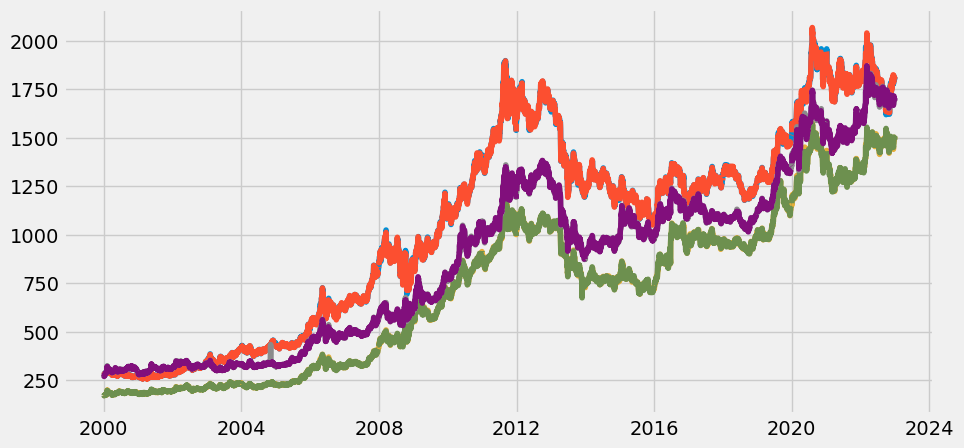

In [29]:
#plotting the data set
plt.figure(figsize=(10,5), dpi=100)
plt.plot(data_sub)

In [30]:
data_sub.dropna()

,USD (AM),USD (PM),GBP (AM),GBP (PM),EURO (AM),EURO (PM)
datetime,,,,,,
2000-01-04,282.05,281.50,172.166,171.929,275.305,272.402
2000-01-05,282.10,280.45,171.729,170.808,272.035,270.470
2000-01-06,280.35,279.40,170.446,169.518,270.974,269.152
2000-01-07,282.00,282.10,171.324,172.065,273.840,274.017
2000-01-10,281.70,281.60,172.230,171.959,275.205,274.812
...,...,...,...,...,...,...
2022-12-20,1806.35,1813.90,1486.630,1492.110,1698.510,1705.790
2022-12-21,1813.50,1817.55,1493.240,1502.390,1707.230,1713.770
2022-12-22,1815.20,1800.70,1501.350,1498.000,1705.380,1697.340


In [31]:
#check for and find missing values
data_sub.isnull().sum()

USD (AM)      0
USD (PM)     46
GBP (AM)      0
GBP (PM)     46
EURO (AM)     0
EURO (PM)    46
dtype: int64

In [32]:
data_sub.columns

Index(['USD (AM)', 'USD (PM)', 'GBP (AM)', 'GBP (PM)', 'EURO (AM)',
       'EURO (PM)'],
      dtype='object')

In [33]:
df =data_sub[['USD (AM)']]

In [34]:
df.head(20)

,USD (AM)
datetime,
2000-01-04,282.05
2000-01-05,282.10
2000-01-06,280.35
2000-01-07,282.00
2000-01-10,281.70
2000-01-11,281.70
2000-01-12,282.25
2000-01-13,282.20
2000-01-14,284.15


2. Decompose the Data's Components

In [35]:
#decomposition of the data set
decomposition = sm.tsa.seasonal_decompose(df, model='additive', period = 365)

In [36]:
from pylab import rcParams 

rcParams['figure.figsize'] = 20, 8

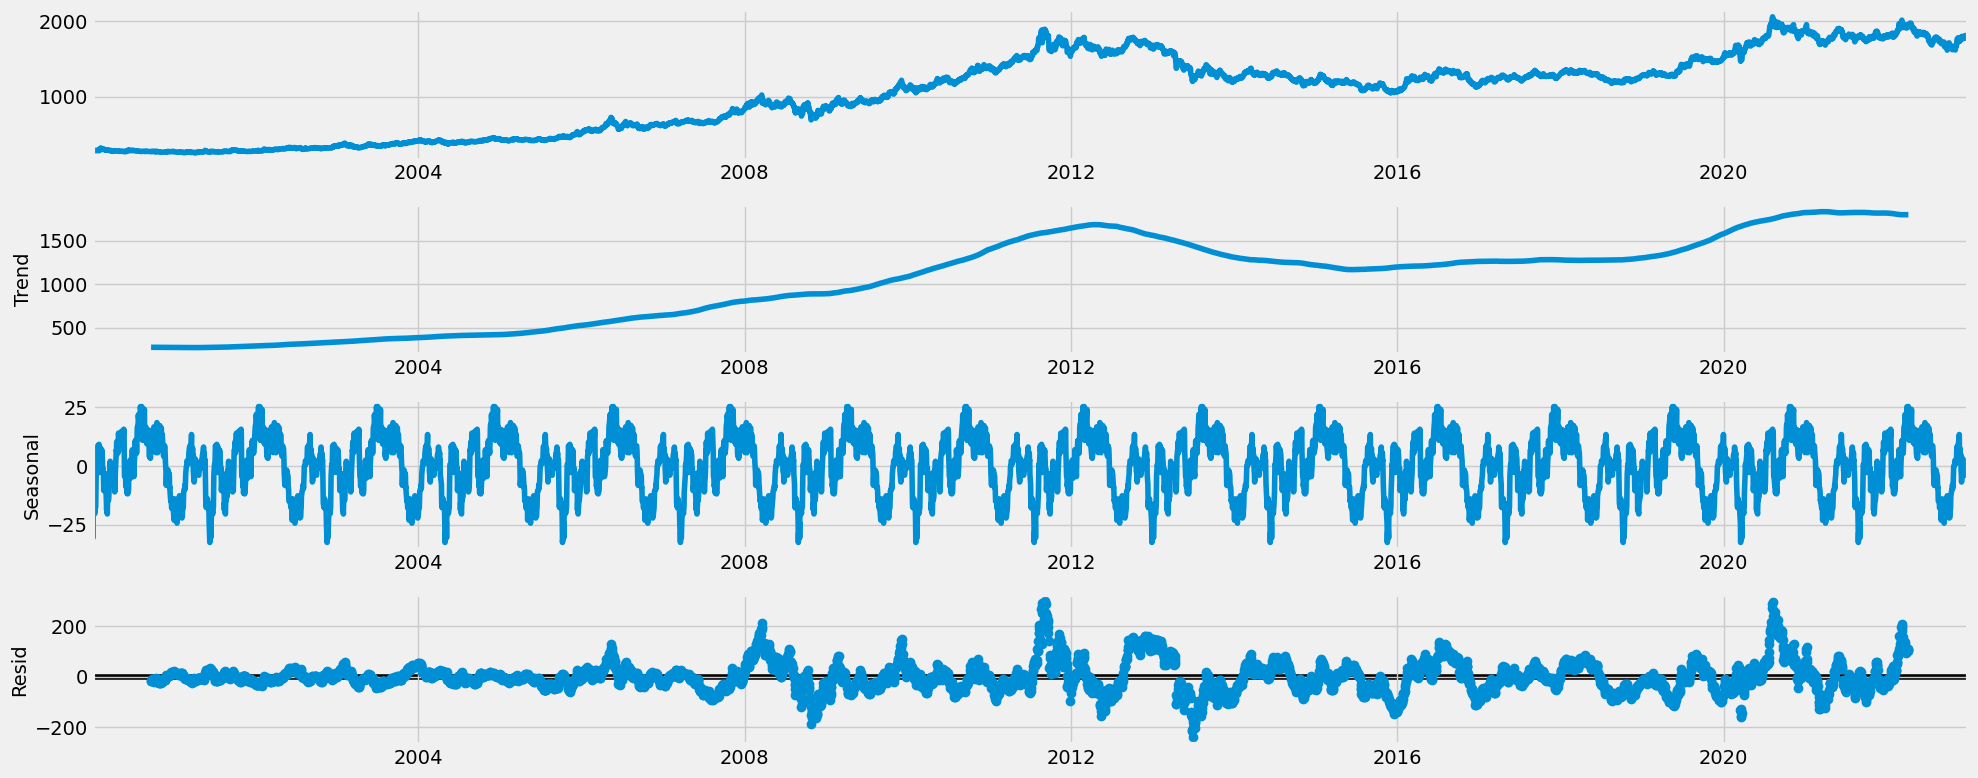

In [37]:
#plotting of the separate components
decomposition.plot()
plt.show()

Initial Observation

The line at the top of the chart progressively and slightly has an upward trend, though there are some fluctuations or "noise" in that data line.

The next line, while it follows a similar path, we can see that this line has been smoothed out.

The third line represents the "Seasonality" in the data as we can see that there are consistent peaks and valleys at the same times each year.

The last line, also called "Resid", we can see there is some noise in this line, especially starting shortly after 2008.

3. Conduct a Dickey-Fuller test to check for Stationarity

In [38]:
from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    
    # Execute the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(df['USD (AM)'])

Dickey-Fuller Stationarity test:
Test Statistic                   -0.741019
p-value                           0.835837
Number of Lags Used              31.000000
Number of Observations Used    5779.000000
Critical Value (1%)              -3.431482
Critical Value (5%)              -2.862040
Critical Value (10%)             -2.567036
dtype: float64


After conducting the Dickey-Fuller Stationarity test, we ended up with a p-value of 0.835837

Our test statistic is -0.741019. 

Because we set our Critical Value of 5% is at -2.862040, this is smaller than our test statistic of -0.741019.

We can determine that this is a non-stationary model.

4. Conducting a round of Differencing 

In [39]:
data_diff = df - df.shift(1)

In [40]:
data_diff.dropna(inplace = True)

In [41]:
data_diff.head(10)

,USD (AM)
datetime,
2000-01-05,0.05
2000-01-06,-1.75
2000-01-07,1.65
2000-01-10,-0.30
2000-01-11,0.00
2000-01-12,0.55
2000-01-13,-0.05
2000-01-14,1.95
2000-01-17,0.75


In [42]:
data_diff.columns

Index(['USD (AM)'], dtype='object')

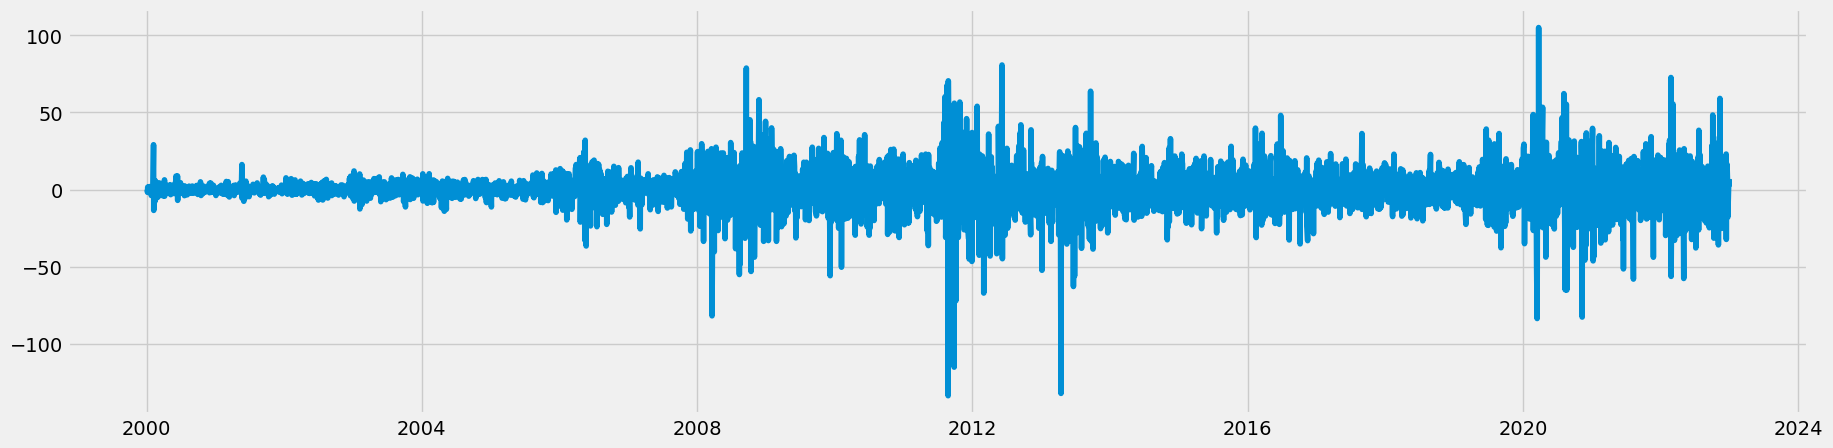

In [43]:
#plotting the data
plt.figure(figsize=(20,5), dpi=100)
plt.plot(data_diff)

In [44]:
#conducting another round of the Dickey-Fuller test
dickey_fuller(data_diff)

Dickey-Fuller Stationarity test:
Test Statistic                -1.486159e+01
p-value                        1.715963e-27
Number of Lags Used            3.000000e+01
Number of Observations Used    5.779000e+03
Critical Value (1%)           -3.431482e+00
Critical Value (5%)           -2.862040e+00
Critical Value (10%)          -2.567036e+00
dtype: float64


After conducting a round of differencing, we found that the Test Statistic is -1.486159e+01, which is smaller than our Critical Value (5%), so once again, we find that this model is non-stationary.

5. Perform another round of differencing

In [45]:
data_diff_2 = data_diff - data_diff.shift(1)

In [46]:
data_diff_2.dropna(inplace = True)

In [47]:
data_diff_2.head(10)

,USD (AM)
datetime,
2000-01-06,-1.80
2000-01-07,3.40
2000-01-10,-1.95
2000-01-11,0.30
2000-01-12,0.55
2000-01-13,-0.60
2000-01-14,2.00
2000-01-17,-1.20
2000-01-18,1.20


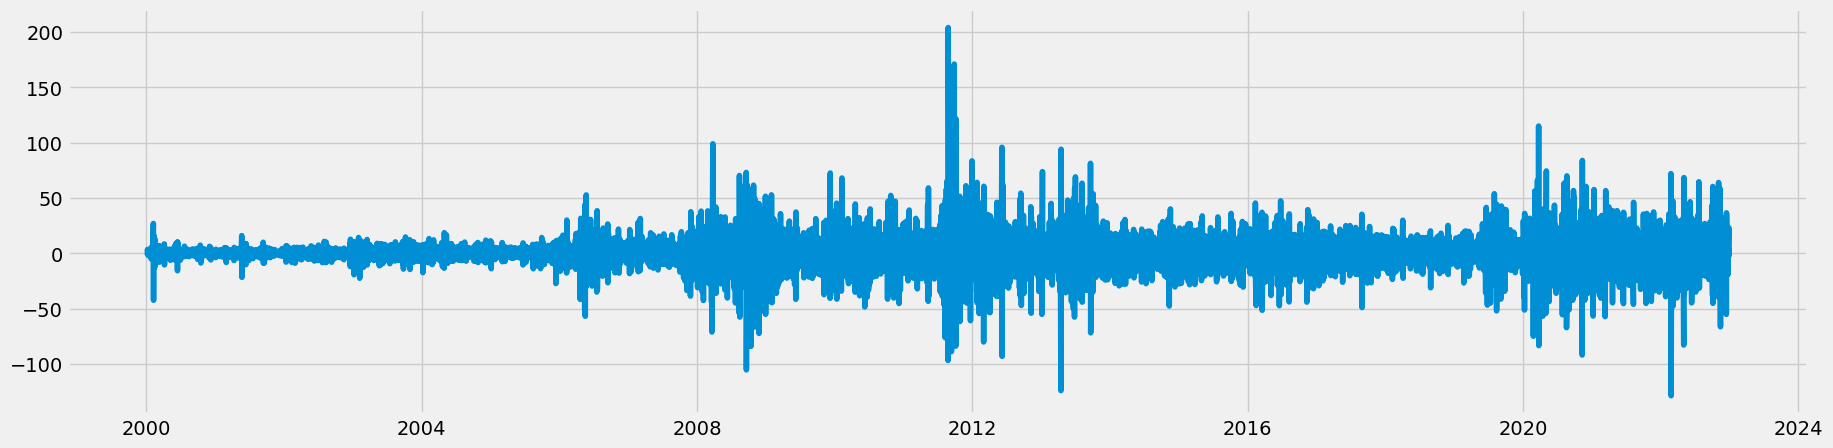

In [48]:
#plotting the new data
plt.figure(figsize=(20,5), dpi=100)
plt.plot(data_diff_2)

In [49]:
#conducting another Dickey-Fuller test
dickey_fuller(data_diff_2)

Dickey-Fuller Stationarity test:
Test Statistic                  -21.928064
p-value                           0.000000
Number of Lags Used              34.000000
Number of Observations Used    5774.000000
Critical Value (1%)              -3.431483
Critical Value (5%)              -2.862041
Critical Value (10%)             -2.567037
dtype: float64


After another round of differencing, we found that the Test statistic is -21.928064, which is smaller that the Critial Value (5%) of -2.862041. Therefore, this model is also non-stationary.

6. Checking the data's autocorrelations

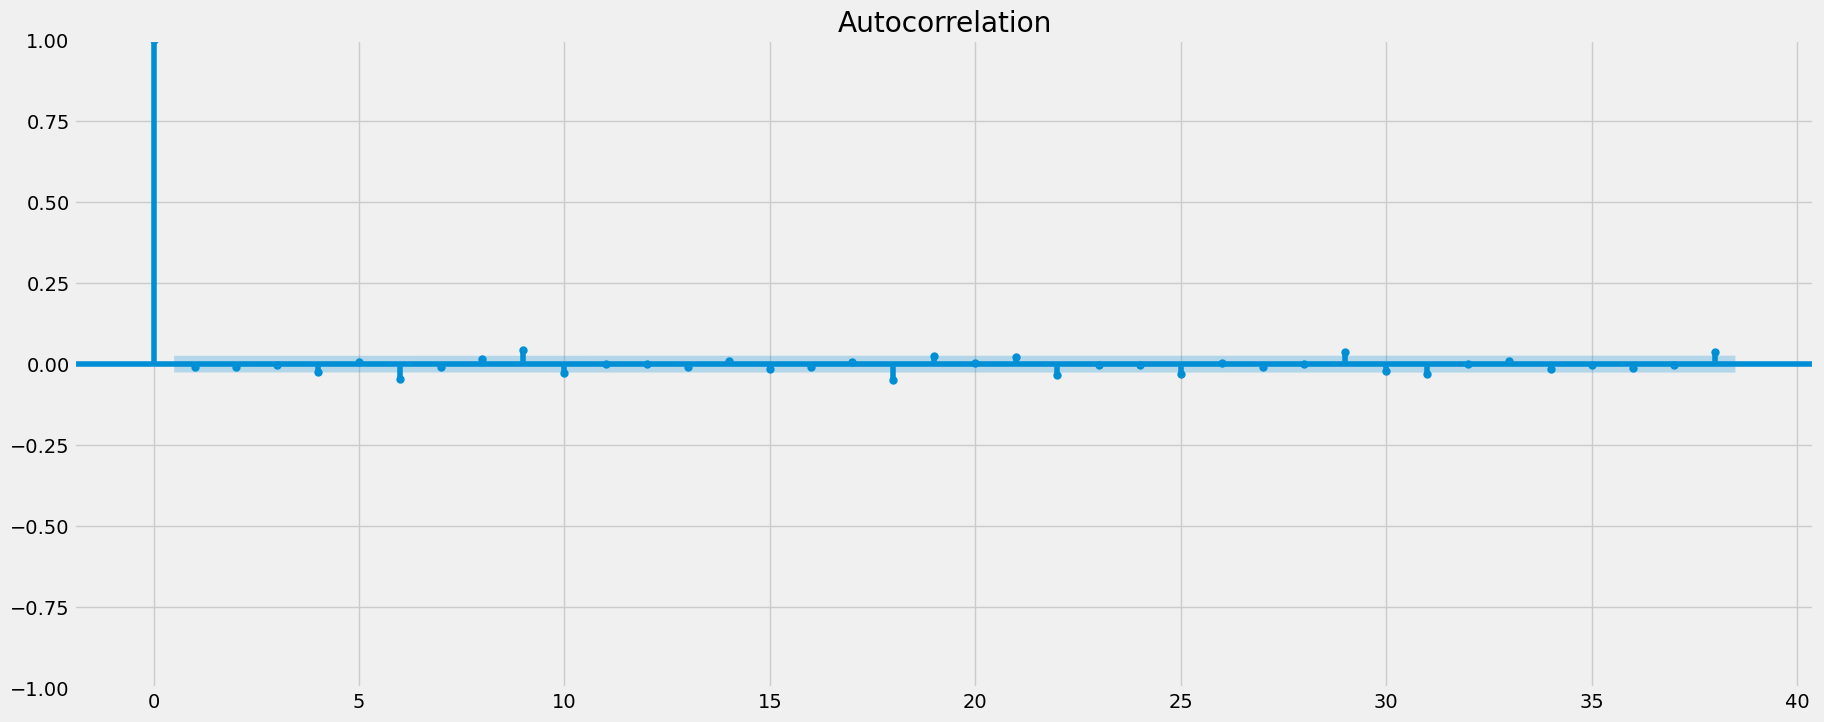

In [51]:
#checking autocorrelations from the first differencing model
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 

plot_acf(data_diff)
plt.show()

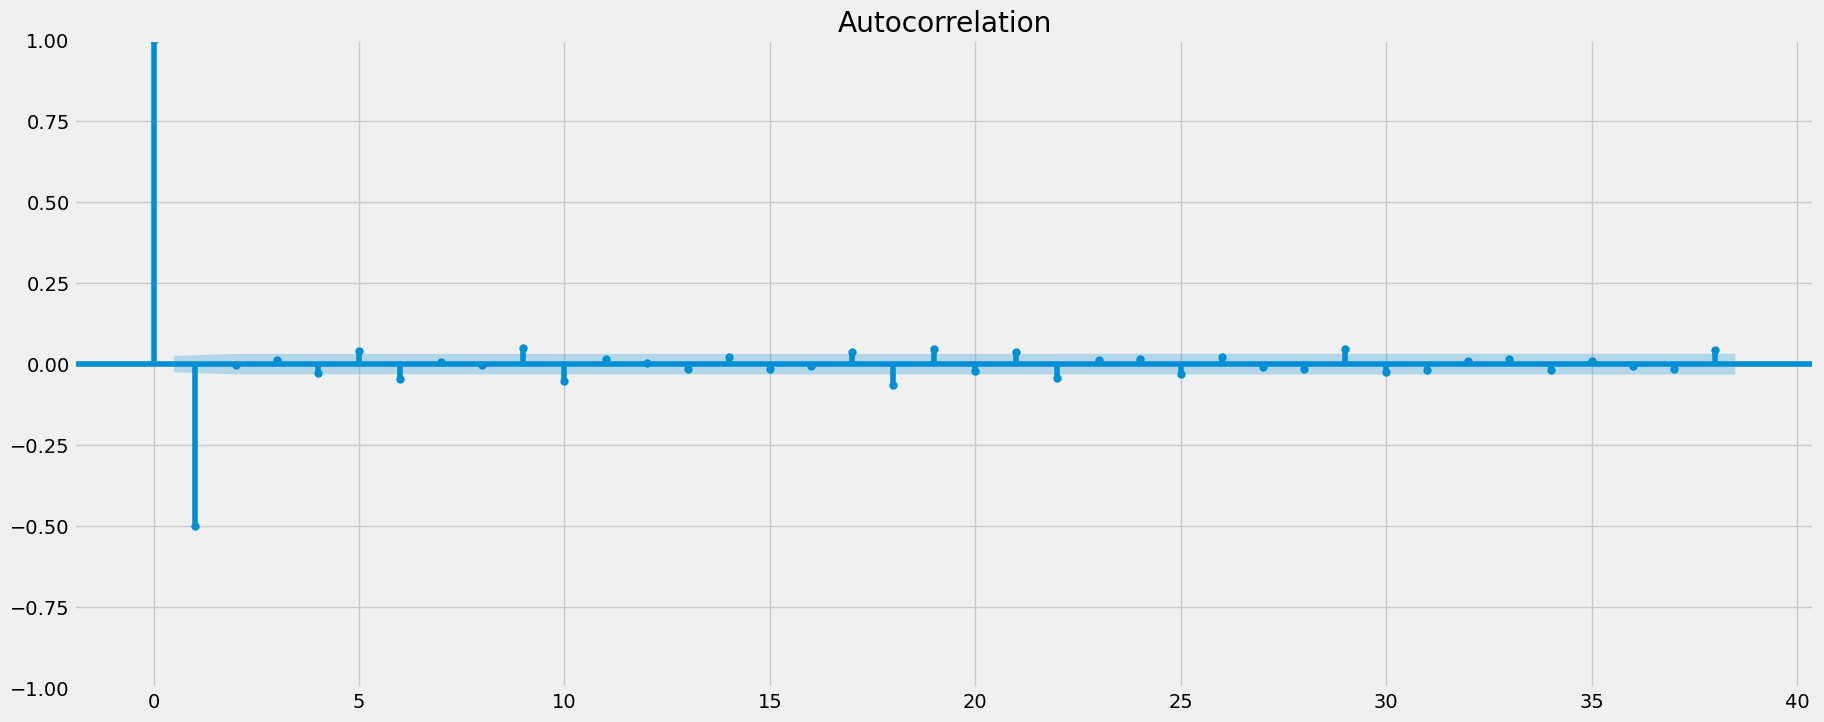

In [52]:
#checking for autocorrelations from the second differencing model
plot_acf(data_diff_2)
plt.show()

Observation:

After checking for autocorrelations, we can conclude that the correlation is not strong. After running two rounds of defferencing, the model is non-stationary. 